## Elementos finitos linear 1D

## Montar a matrix de massa

In [2]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = -1/(b-a)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
dmass_matrix(a, b)= [2/(b-a) -2/(b-a); -2/(b-a) 2/(b-a) ]

dmass_matrix (generic function with 1 method)

In [3]:
mass_matrix(-1,1)

2x2 Array{Float64,2}:
 0.666667  0.333333
 0.333333  0.666667

In [4]:
mass_matrix(0,1)

2x2 Array{Float64,2}:
 0.333333  0.166667
 0.166667  0.333333

In [5]:
a = -1.0
b = 1.0
xn = [linspace(a,b,3);]
Ndof = size(xn,1);

In [6]:
Ndof

3

In [358]:
xn

3-element Array{Float64,1}:
 -1.0
  0.0
  1.0

In [359]:
Nel = size(xn,1)-1
dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
    dof_map[1,i] = i
    dof_map[2,i] = i+1
end
dof_map

2x2 Array{Int64,2}:
 1  2
 2  3

In [360]:
M = zeros(Ndof, Ndof)

for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            M[kg,ig] += Me[k,i]
        end
    end
end
M

dM = zeros(Ndof, Ndof)

for e = 1:Nel
    dMe = dmass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            dM[kg,ig] += dMe[k,i]
        end
    end
end
dM

z = zglj(Ndof)
w = wglj(z)
for i in 1:Ndof
    dM[i,i] = dM[i,i] - w[i]
end

dM
            

3x3 Array{Float64,2}:
  1.66667  -2.0       0.0    
 -2.0       2.66667  -2.0    
  0.0      -2.0       1.66667

## Montar o lado direito da equação:

In [361]:
fun(x) = cos(2π*x)

fun (generic function with 1 method)

In [362]:
fe = fun(xn)

3-element Array{Float64,1}:
  2.44929e-16
  0.0        
 -2.44929e-16

In [363]:
xn

3-element Array{Float64,1}:
 -1.0
  0.0
  1.0

In [364]:
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end
        

# Calculando a integral de maneira mais exata:
using Jacobi
Q = 10
z = zgj(Q)
w = wgj(z)

F2 = zeros(Ndof)
for e = 1:Nel
    Fe1 = 0.0
    Fe2 = 0.0
    a1 = xn[e]
    b1 = xn[e+1]
    x = ( (1-z)*a1 + (1+z)*b1 ) / 2
    J = (b1-a1) / 2
    for q = 1:Q
        f = fun(x[q])
        Fe1 += J * w[q] * f * ϕ₁(x[q], a1, b1)
        Fe2 += J * w[q] * f * ϕ₂(x[q], a1, b1)
    end
    i1 = dof_map[1,e]
    i2 = dof_map[2,e]
    F2[i1] += Fe1
    F2[i2] += Fe2
end



In [365]:
F = -F

3-element Array{Float64,1}:
 -8.16431e-17
 -0.0        
  8.16431e-17

In [366]:
F2 = -F2

3-element Array{Float64,1}:
 -0.159155   
 -2.77556e-17
  0.159155   

## Solução do problema

In [367]:
u = M\F

3-element Array{Float64,1}:
 -2.44929e-16
  0.0        
  2.44929e-16

In [368]:
hcat(F,F2)

3x2 Array{Float64,2}:
 -8.16431e-17  -0.159155   
 -0.0          -2.77556e-17
  8.16431e-17   0.159155   

In [369]:
u2 = M\F2

3-element Array{Float64,1}:
 -0.477465
  0.0     
  0.477465

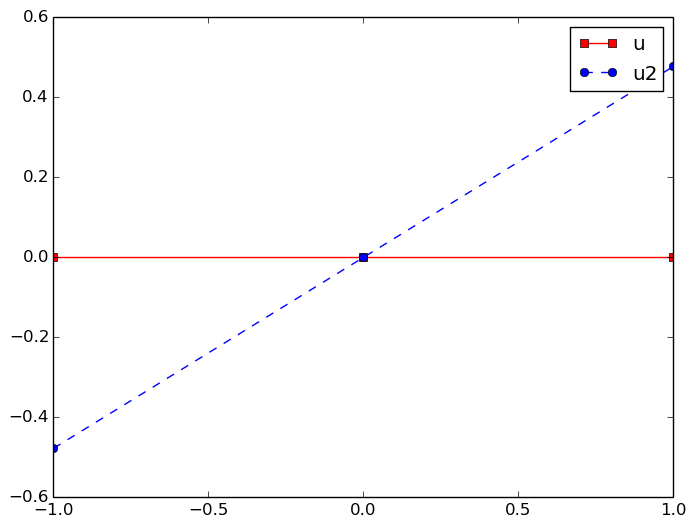

PyObject <matplotlib.legend.Legend object at 0x7f0182d780d0>

In [370]:
using PyPlot
xx = linspace(a, b, 201)
#plot(xx, resp(xx))
plot(xn, u, "rs-",label = "u")
plot(xn, u2, "bo--",label = "u2")
legend()

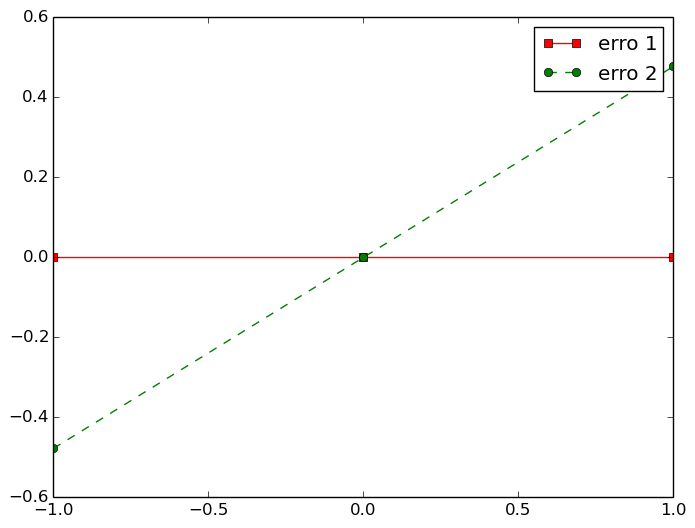

PyObject <matplotlib.legend.Legend object at 0x7f0182b2ca90>

In [371]:

e1 = u - fe
e2 = u2 - fe
figure()
plot(xn, e1, "rs-",label="erro 1")
plot(xn, e2, "go--",label="erro 2")
legend()

In [372]:
#Pkg.add("Gadfly")
using Gadfly

In [373]:
Gadfly.plot(x= xx , y = e1)

ErrorException: The following aesthetics are required by Geom.point to be of equal length: x, y
